#**Exploring Option Chain Data**
In this notebook we will explore potential relationships in option chain data using visualizations that should allow us to know more about the nature of our datataset. 

In [8]:
# Mount drive to access the option data (if using colab)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define general plot settings
%matplotlib inline
plt.rcParams['figure.dpi'] = 150

# Import data as a pandas df
df = pd.read_parquet("drive/MyDrive/MAN_Competition_PyData/option_chain_data.parquet")

In [10]:
# Let's check our variables and first few lines of data from the options chain
df.head() 

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,date,ticker,type
0,GOOG220617C00700000,2022-01-05 17:22:59+00:00,700.0,2121.21,2050.8,2066.0,-106.91992,-4.79864,1.0,205.0,9.810185,1.0,REGULAR,USD,2022-05-19,GOOG,Call
1,GOOG220617C00720000,2021-11-08 18:25:44+00:00,720.0,2277.80,2246.3,2265.0,0.00000,0.00000,20.0,108.0,0.000000,1.0,REGULAR,USD,2022-05-19,GOOG,Call
2,GOOG220617C00740000,2021-11-10 11:51:11+00:00,740.0,2013.89,2226.2,2242.1,0.00000,0.00000,2.0,112.0,17.746342,1.0,REGULAR,USD,2022-05-19,GOOG,Call
3,GOOG220617C00760000,2021-11-10 11:51:11+00:00,760.0,1974.24,2206.9,2222.1,0.00000,0.00000,44.0,95.0,15.505127,1.0,REGULAR,USD,2022-05-19,GOOG,Call
4,GOOG220617C00780000,2021-11-10 11:51:11+00:00,780.0,2088.11,2187.7,2204.0,0.00000,0.00000,2.0,121.0,14.298585,1.0,REGULAR,USD,2022-05-19,GOOG,Call


## V1: Orders and Volume ##
I want to know how orders and volume are related. Will the number of orders be similarly distributed as the volume or are there some options who tend to be more "bulk bought"?

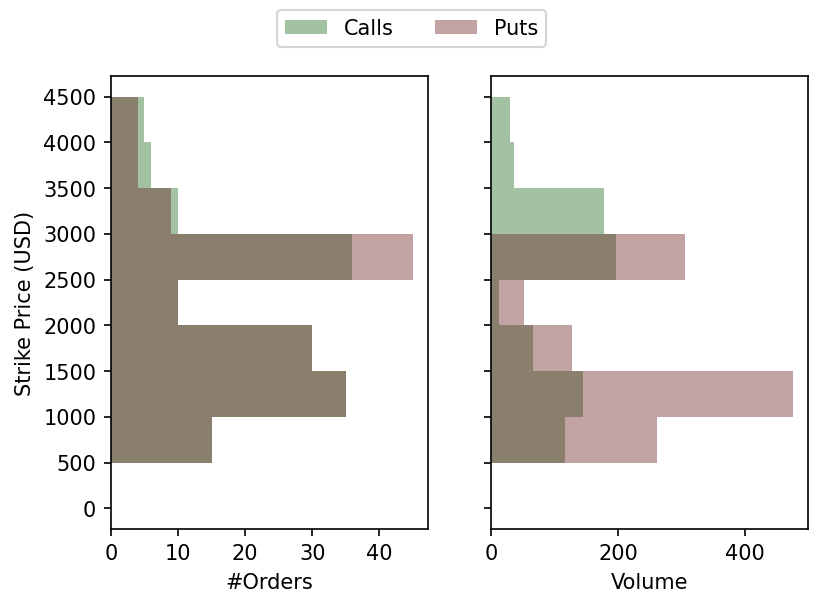

In [11]:
df_strike_p = df.loc[df['type'] == 'Put', 'strike']
df_strike_c = df.loc[df['type'] == 'Call','strike']

df_vol_p = df.loc[df['type'] == 'Put', 'volume']
df_vol_c = df.loc[df['type'] == 'Call','volume']

bins = np.linspace(0,4500,10)

fig, axs = plt.subplots(ncols=2,sharey=True)

axs[0].hist(df_strike_c,color=[.1,.4,.1,.4],orientation='horizontal',bins=bins)
axs[0].hist(df_strike_p,color=[.4, .1, .1,.4],orientation='horizontal',bins=bins)
axs[0].set_xlabel('#Orders')
axs[0].set_ylabel('Strike Price (USD)')

axs[1].hist(df_strike_c,weights=df_vol_c,color=[.1,.4,.1,.4],orientation='horizontal',bins=bins)
axs[1].hist(df_strike_p,weights=df_vol_p,color=[.4, .1, .1,.4],orientation='horizontal',bins=bins)
axs[1].set_xlabel('Volume')

fig.legend(['Calls','Puts'],loc='upper center',ncol=2)


plt.yticks(bins);

While the number of orders seems to be similar for puts and calls across the given trimeframe (left plot), we can see that this story changes for volume (right plot). Volume of high strike price calls seems to be bigger than volume for high strike price puts. Conversely, volume of low strike price puts seems to be higher than volume of low strike price calls.

## V2: Support and resistance equilibrium 
Now I want to shed some light on where the potential resistance and support points may lie by looking at the open interest of options across all strike prices available

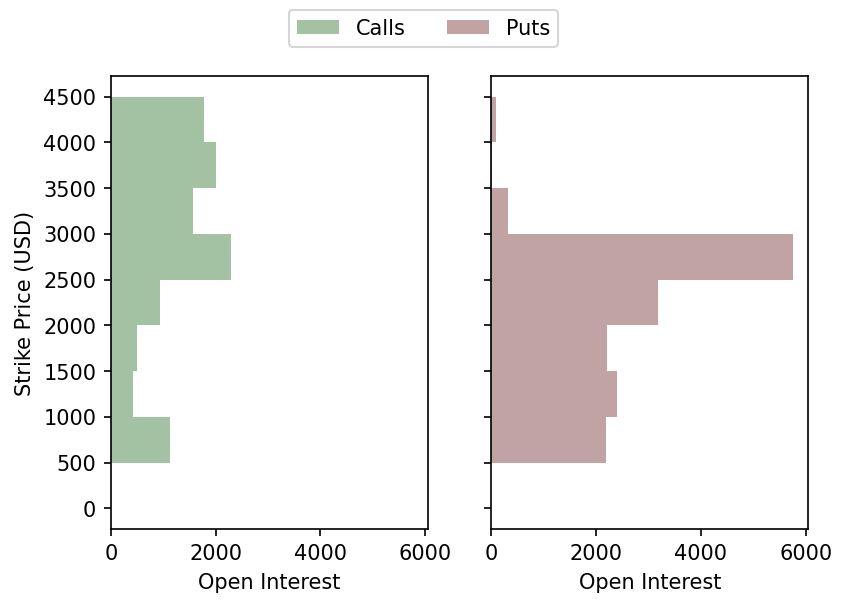

In [12]:

df_oi_p = df.loc[df['type'] == 'Put', 'openInterest']
df_oi_c = df.loc[df['type'] == 'Call','openInterest']

fig, axs = plt.subplots(ncols=2,sharey=True,sharex=True)

axs[0].hist(df_strike_c,weights=df_oi_c,color=[.1,.4,.1,.4],orientation='horizontal',bins=bins)
axs[0].set_xlabel('Open Interest')
axs[0].set_ylabel('Strike Price (USD)')

axs[1].hist(df_strike_p,weights=df_oi_p,color=[.4, .1, .1,.4],orientation='horizontal',bins=bins)
axs[1].set_xlabel('Open Interest')

plt.yticks(bins)
fig.legend(['Calls','Puts'],loc='upper center',ncol=2);

We conclude that while the mode of strike price for calls and puts is around the same strike price (2500 USD to 3000 USD), the open interest for puts is much higher on that interval. In fact, the general open interest of puts seems to be higher for puts than for calls in general (except for some of the higher strike prices).

## V3: Changes across strike prices?
Next, I want to know how the last price of an option as well as the bid/ask spread and implied volatility change across puts and calls with different strike prices

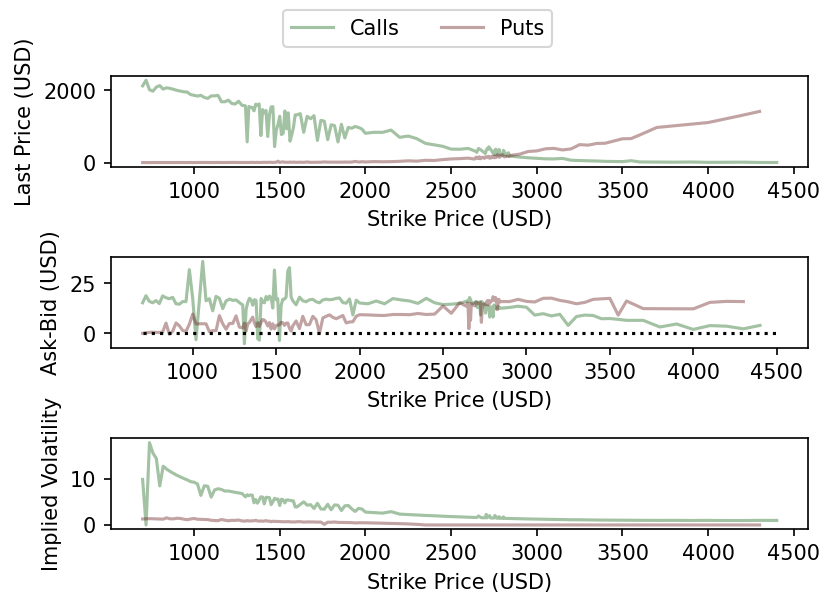

In [13]:
## Price per call and put options, bid-ask spread and implied volatility
df_price_p = df.loc[df['type'] == 'Put', 'lastPrice']
df_price_c = df.loc[df['type'] == 'Call','lastPrice']

bidask_p = df.loc[df['type'] == 'Put', ['bid','ask']]
bidask_c = df.loc[df['type'] == 'Call', ['bid','ask']]
ba_spread_p = bidask_p['ask'] - bidask_p['bid']
ba_spread_c = bidask_c['ask'] - bidask_c['bid']



df_volat_p = df.loc[df['type'] == 'Put', 'impliedVolatility']
df_volat_c = df.loc[df['type'] == 'Call','impliedVolatility']

fig, axs = plt.subplots(nrows=3)

axs[0].plot(df_strike_c,df_price_c,color=[.1,.4,.1,.4])
axs[0].plot(df_strike_p,df_price_p,color=[.4, .1, .1,.4])
axs[0].set_ylabel('Last Price (USD)')
axs[0].set_xlabel('Strike Price (USD)')

plt.subplots_adjust(hspace=1)

axs[1].plot(df_strike_c,ba_spread_c,color=[.1,.4,.1,.4])
axs[1].plot(df_strike_p,ba_spread_p,color=[.4, .1, .1,.4])
axs[1].plot([min(df_strike_c),4500],[0,0],color='k',linestyle='dotted')
axs[1].set_ylabel('Ask-Bid (USD)')
axs[1].set_xlabel('Strike Price (USD)')

plt.subplots_adjust(hspace=1)

axs[2].plot(df_strike_c,df_volat_c,color=[.1,.4,.1,.4])
axs[2].plot(df_strike_p,df_volat_p,color=[.4, .1, .1,.4])
axs[2].set_ylabel('Implied Volatility')
axs[2].set_xlabel('Strike Price (USD)')

fig.legend(['Calls','Puts'],loc='upper center',ncol=2);

First plot:
* We see that the last price of a call decreases with the strike price while on the other hand the last price of a put increases with a higher strike price. Together with the previous plots in V1, we can conclude that a good amount of  large-volume trades are happening in lower-priced options.

Second plot:
* The bid-ask spread shows an interesting variability for call options with a strike price between 1000 USD and 1700 USD: while some calls show remarkable spreads, others very low spreads and even cases where the bid price is higher than the ask price. The later is a case of [crossed market](https://www.investopedia.com/terms/c/crossedmarket.asp) which might mean bad news for the market maker.
* Both the spread and latest price for calls and puts "cross" at roughly the same region of strike price (between 2500 USD and 3000 USD).

Third plot:
* Implied volatility is considerably higher for call versus put options. This is particularly visible for call options with a strike price below 2000 USD, where the volatility is considerably high. Both options show a [smirk](https://www.investopedia.com/terms/v/volatility-skew.asp) type of volatility skew.

## V4: Relationship between last price, volatility and bid/ask spread
Using some scatterplots, let's find out how these relationships change across call and put options for this dataset

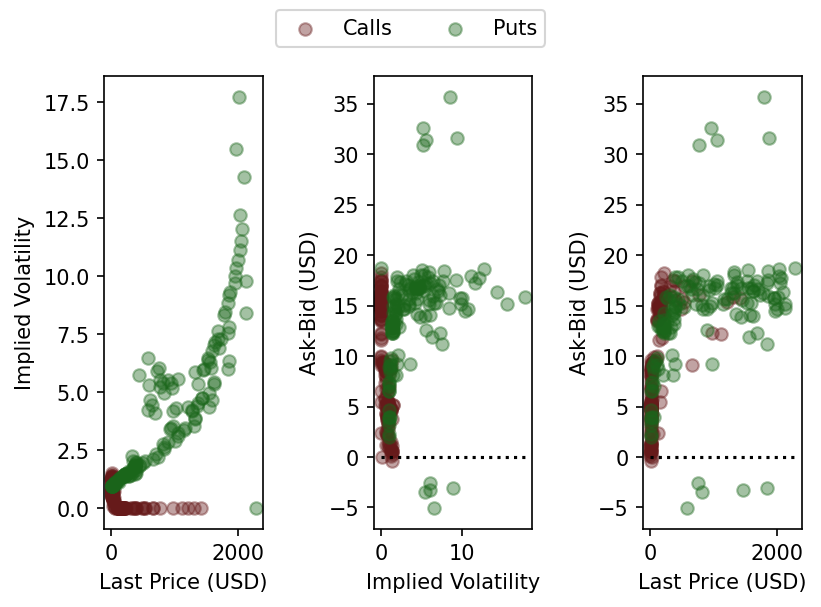

In [14]:
fig, axs = plt.subplots(ncols=3)
plt.subplots_adjust(hspace=.5)

axs[0].scatter(y = df_volat_p,x=df_price_p,color=[.4, .1, .1,.4])
axs[0].scatter(y = df_volat_c,x=df_price_c,color=[.1,.4,.1,.4])
axs[0].set_ylabel('Implied Volatility')
axs[0].set_xlabel('Last Price (USD)')

axs[1].scatter(x = df_volat_p,y=ba_spread_p,color=[.4, .1, .1,.4])
axs[1].scatter(x = df_volat_c,y=ba_spread_c,color=[.1,.4,.1,.4])
axs[1].plot([0,max(df_volat_c)],[0,0],color='k',linestyle='dotted')
axs[1].set_ylabel('Ask-Bid (USD)')
axs[1].set_xlabel('Implied Volatility')

axs[2].scatter(x = df_price_p,y=ba_spread_p,color=[.4, .1, .1,.4])
axs[2].scatter(x = df_price_c,y=ba_spread_c,color=[.1,.4,.1,.4])
axs[2].plot([0,max(df_price_c)],[0,0],color='k',linestyle='dotted')
axs[2].set_ylabel('Ask-Bid (USD)')
axs[2].set_xlabel('Last Price (USD)')

fig.legend(['Calls','Puts'],loc='upper center',ncol=2)
plt.subplots_adjust(wspace=.7);

While volatility decreases rapidly until a plateau with larger last prices for puts, it increases exponentially with larger last prices for calls. The ask-bid spread decreases rapidly the higher the volatility for puts but a somewhat opposite behaviour is seen for call options. Finally, the bid-ask spread for both puts and calls seems to increase until a plateau with higher last prices.

## V5: Volatility Skew
According to [Investopedia](https://www.investopedia.com/terms/v/volatility-skew.asp),

> "the volatility skew is the difference in implied volatility (IV) between out-of-the-money options, at-the-money options, and in-the-money options".

So let's visualize how volatile are options in the money (ITM) vs not in the money










 

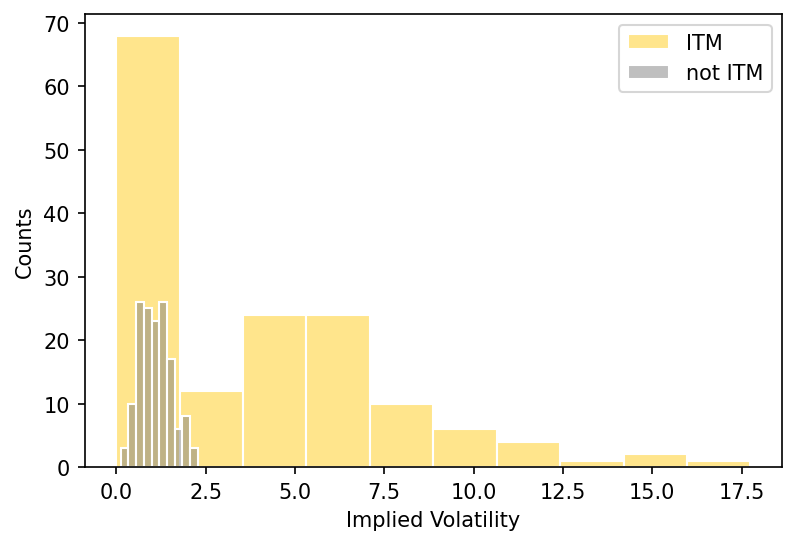

In [21]:
df_itm =  df.loc[df['inTheMoney'] == 1, 'impliedVolatility']
df_nitm = df.loc[df['inTheMoney'] == 0, 'impliedVolatility']

plt.hist(df_itm, color = [1,.8,.1,.5], edgecolor = 'white')
plt.hist(df_nitm, color = [.5,.5,.5,.5], edgecolor = 'white')
plt.xlabel('Implied Volatility')
plt.ylabel('Counts')
plt.legend(['ITM','not ITM']);